# Used Car Predicition
---

## 1.1 Dataset Information

<strong>This dataset is downloaded from <a href="https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho?select=CAR+DETAILS+FROM+CAR+DEKHO.csv">Vehicle dataset from cardekho</a> </strong>


<p>
    This dataset contains information about used cars listed on www.cardekho.com
This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning.
    </p>
    
The columns in the given dataset are as follows:

* name
* year
* selling_price
* km_driven
* fuel
* seller_type
* transmission
* Owner

**Selling Price(predcition) is the dependent variable**
    

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import os

%matplotlib inline
data_path = os.path.join(os.path.curdir, 'Data')

In [97]:
# read the data
data = pd.read_csv(data_path + "/car_data.csv")
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [19]:
print("check for null values".center(50,'-'))
print()
print(data.isnull().sum())

--------------check for null values---------------

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64


**`None of the features have null values`**

In [20]:
print("Categorical Variables".center(50,"="))
print()
print("Fuel Type:", data.Fuel_Type.unique())
print("Seller_Type:", data.Seller_Type.unique())
print("Transmission:", data.Transmission.unique())
print("Owner: ", data.Owner.unique())

==============Categorical Variables===============

Fuel Type: ['Petrol' 'Diesel' 'CNG']
Seller_Type: ['Dealer' 'Individual']
Transmission: ['Manual' 'Automatic']
Owner:  [0 1 3]


* **`There are four categorical features which will be one hot encoded`**
* **`The car brand shouldn't be used to predicting selling price, Hence it will be dropped`**

In [98]:
data = data[data.columns[1:]]
data.head()  

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


#### Add another feature (year_old): How old is the car

In [99]:
# subtract the make year from the current year
data['year_old'] = dt.datetime.now().year - data.Year
data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,year_old
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [48]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,year_old
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189,6.372093
std,2.891554,5.082812,8.644115,38886.883882,0.247915,2.891554
min,2003.000000,0.100000,0.320000,500.000000,0.000000,2.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000,4.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000,6.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000,8.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000,17.000000


## 1.2: EDA

#### check the distribution of dependent variable(selling_price)

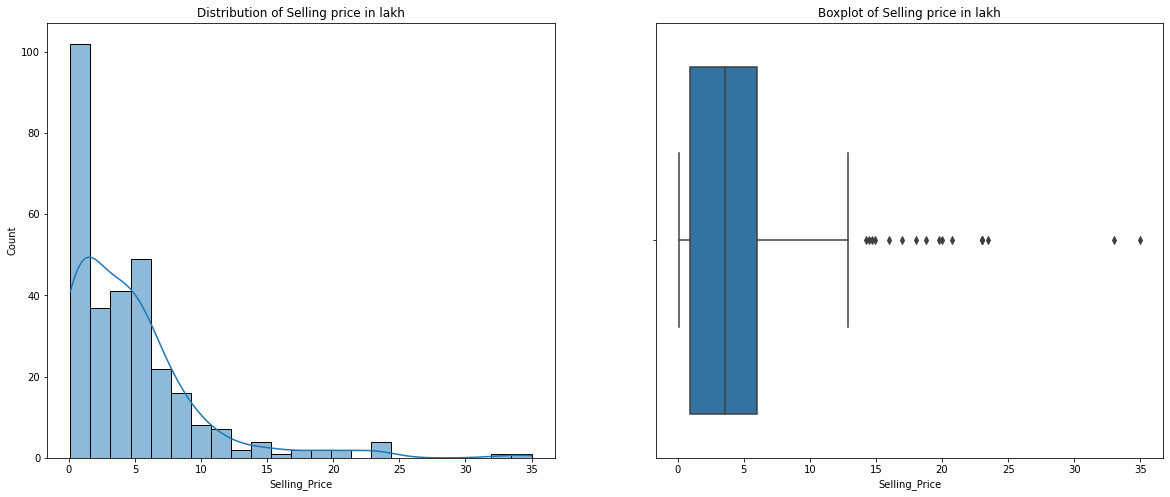

In [65]:
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(121)
sns.histplot(data.Selling_Price, kde=True, ax=ax1)
plt.title("Distribution of Selling price in lakh")

ax2 = fig.add_subplot(122)
sns.boxplot(x=data.Selling_Price, ax=ax2)
plt.title("Boxplot of Selling price in lakh")

plt.show()

* Most cars are being sold in the range of 1 to 6 lakhs, except few cars that are in range 30 to 35 lakh
* Unless the cars are imported or Luxury vechiles, the selling price cannot be that high
* For now we will keep the data in the dataset

In [68]:
print("10 to 100 percentiles: ".center(50,"="))
print()
for i in np.linspace(10, 100, 10):
    print(f"{i}th percentile: {np.percentile(data.Selling_Price, i)}")

print()
print("0 to 1 percentiles: ".center(50,"="))
print()
for i in np.linspace(0.1, 1, 10):
    print(f"{i}th percentile: {np.percentile(data.Selling_Price, i)}")

print()
print("99.1 to 100 percentiles: ".center(50,"="))
print()
for i in np.linspace(99.1, 100, 10):
    print(f"{i}th percentile: {np.percentile(data.Selling_Price, i)}")


=============10 to 100 percentiles: ==============

10.0th percentile: 0.4
20.0th percentile: 0.6
30.0th percentile: 1.15
40.0th percentile: 2.7
50.0th percentile: 3.6
60.0th percentile: 4.75
70.0th percentile: 5.5
80.0th percentile: 7.05
90.0th percentile: 9.5
100.0th percentile: 35.0

===============0 to 1 percentiles: ===============

0.1th percentile: 0.10599999999999998
0.2th percentile: 0.112
0.30000000000000004th percentile: 0.118
0.4th percentile: 0.126
0.5th percentile: 0.135
0.6th percentile: 0.144
0.7000000000000001th percentile: 0.151
0.8th percentile: 0.154
0.9th percentile: 0.157
1.0th percentile: 0.16

============99.1 to 100 percentiles: =============

99.1th percentile: 23.150000000000006
99.19999999999999th percentile: 23.299999999999983
99.3th percentile: 23.44999999999999
99.39999999999999th percentile: 25.399999999999892
99.5th percentile: 28.25
99.6th percentile: 31.100000000000108
99.7th percentile: 33.200000000000045
99.8th percentile: 33.799999999999955
99.9th 

In [67]:
np.linspace(0.1, 1, 10)

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

#### Year_old vs selling price

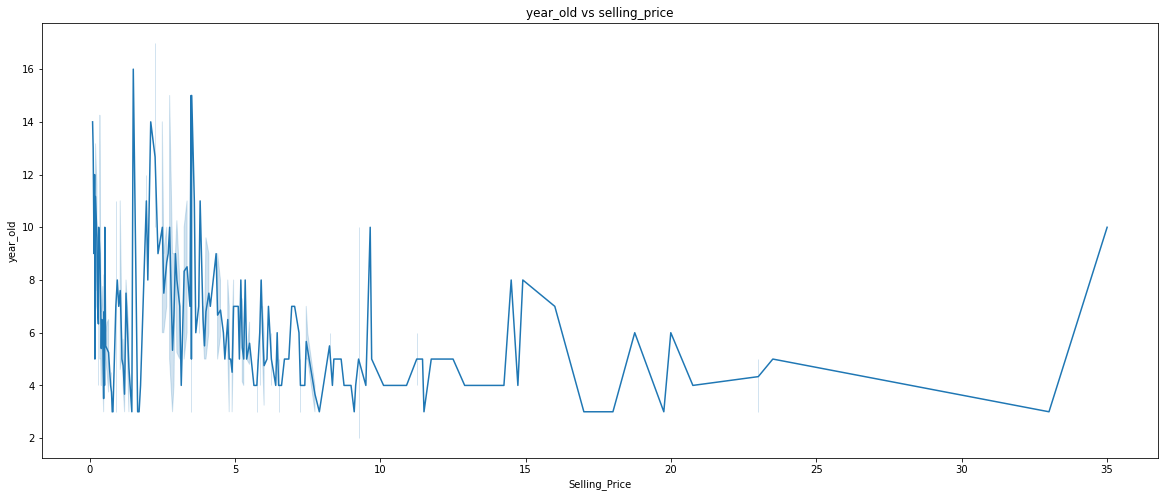

In [71]:
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(111)
sns.lineplot(y="year_old", x='Selling_Price', data=data, ax=ax1)
plt.title("year_old vs selling_price")
plt.show()

* we can see that the selling price is less for most old cars. Higher priced cars are less than 6 years old. 
* Also, the higher priced cars can be luxury cars too, however they arent older that 6 years, which justifies the high price

#### kms driven vs selling price

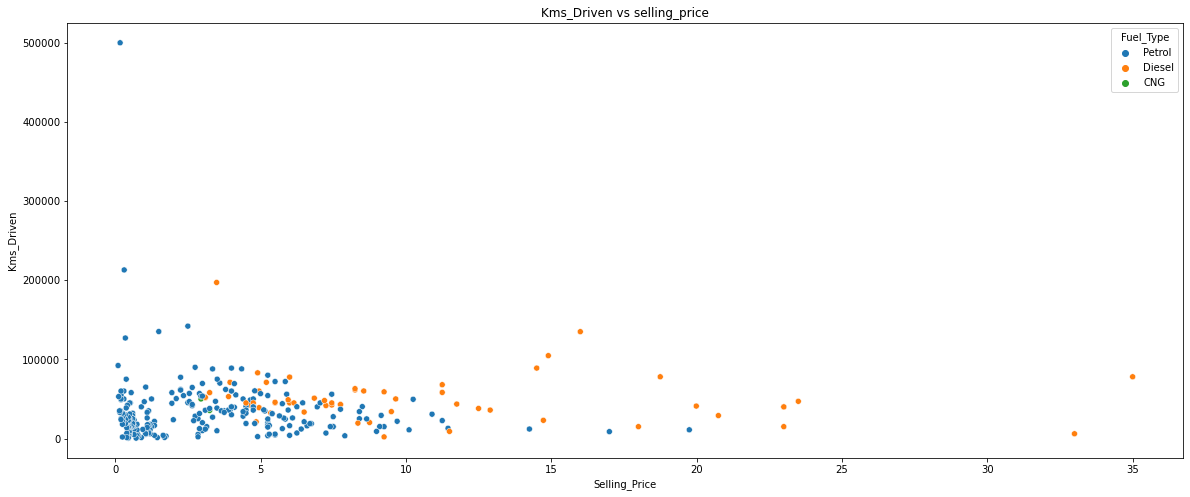

In [72]:
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(111)
sns.scatterplot(y="Kms_Driven", x='Selling_Price', data=data, ax=ax1, hue='Fuel_Type')
plt.title("Kms_Driven vs selling_price")
plt.show()

* There is no car of type CNG. All are either petrol or CNG
* We have some exceptions here, one of the car has 500000 kms driven, which cant be the case in most selling cars.
* Also, two points with above 30 lakhs, can also be removed

### Pair plot between features

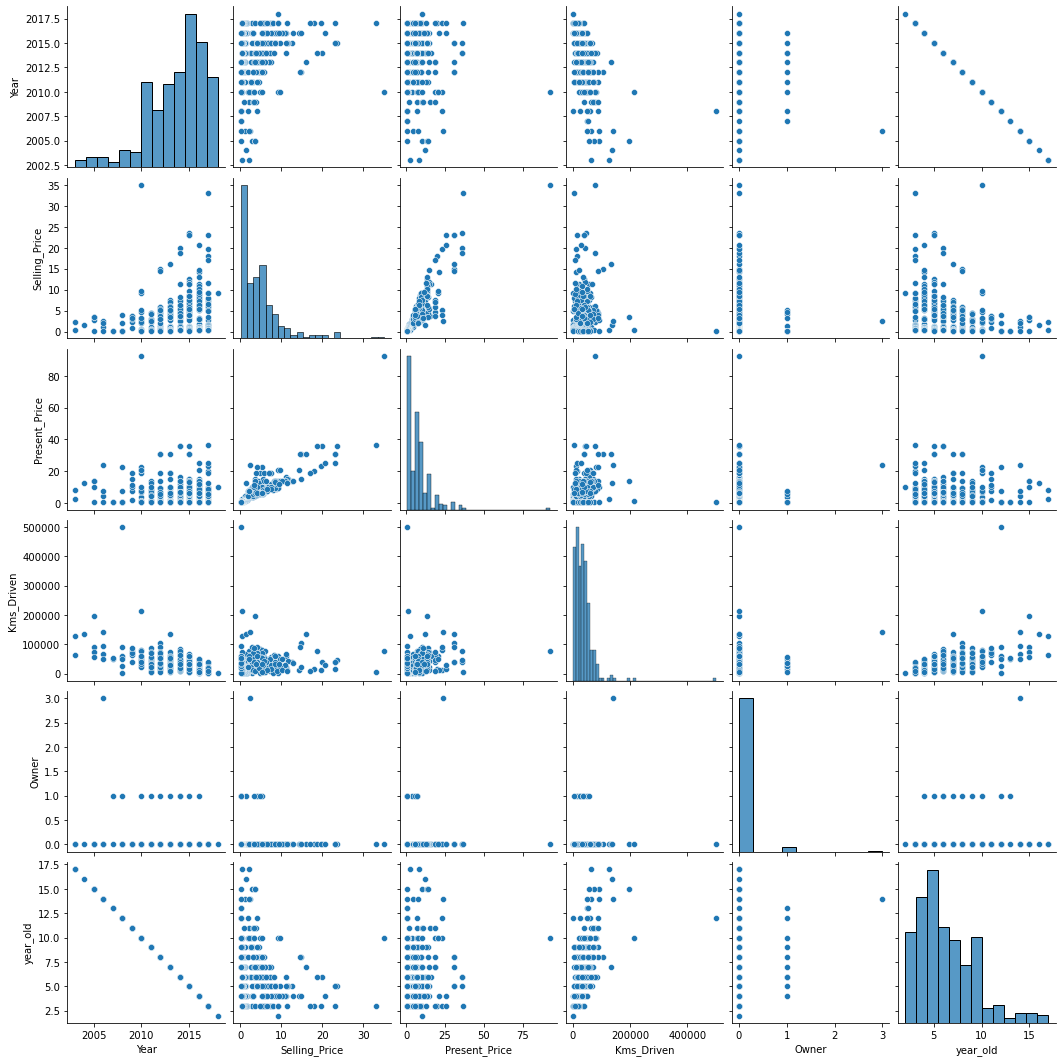

In [73]:
# since we have less features, we will use pair plot to find information in the dataset
sns.pairplot(data)
plt.show()

* Most dataset seems to be valid with no outliers
* The exception of 500k kms will be removed, since it is just one case
* While high price is justified, The car selling at 32l is just 2 years old with cur price around 40l, while another selling at 35l is 10 years old with cur price around 80l+

#### check for collinear features

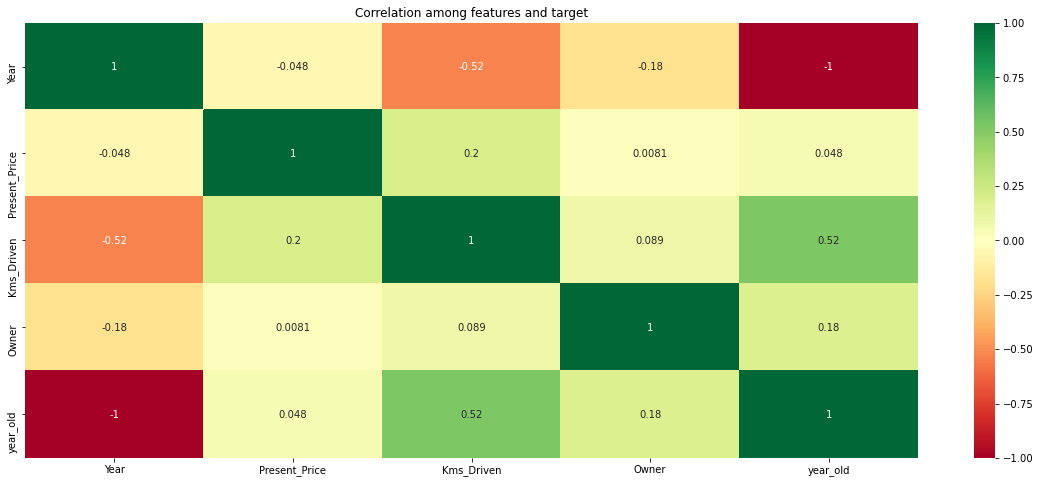

In [79]:
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(111)
data_corr = data.corr()
sns.heatmap(data_corr, cmap='RdYlGn', ax=ax1, annot=True)
plt.title("Correlation among features and target")
plt.show()

* Year & Year_old are obviously negative correlated. We can remove the make year.
* Kms_driven and Year_old are positively correlated by 0.5, but this is ignorable.

# 1.3 Modelling:
---

In [100]:
Y = data.Selling_Price
X = data.drop(['Year', 'Selling_Price'], axis=1)

### encode the categorical variables

In [103]:
X = pd.get_dummies(X, drop_first=True)
X.head()

,Present_Price,Kms_Driven,Owner,year_old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,6,0,1,0,1
1,9.54,43000,0,7,1,0,0,1
2,9.85,6900,0,3,0,1,0,1
3,4.15,5200,0,9,0,1,0,1
4,6.87,42450,0,6,1,0,0,1


#### Train-Test-Split

In [108]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

print("Train size: ", x_train.shape, y_train.shape)
print("Test size: ", x_test.shape, y_test.shape)

Train size:  (240, 8) (240,)
Test size:  (61, 8) (61,)


### feature importance

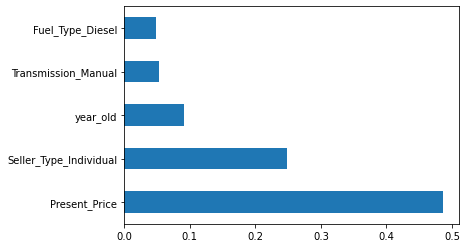

In [122]:
from sklearn.ensemble import ExtraTreesRegressor

extreReg = ExtraTreesRegressor()
extreReg.fit(x_train, y_train)

feature_importance = pd.Series(extreReg.feature_importances_, index=x_train.columns)
feature_importance.nlargest(5).plot(kind='barh')
plt.show()

### cross validation

In [140]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

params = {
    # no of decision tress
    'n_estimators': [50, 100, 200, 300, 500, 1000],
    
    # max depth of each tree
    'max_depth': [1, 3, 4, 5, 9, 15, 20, 25, 30],
    
    # min samples in requires in leaf before stopping to split
    'min_samples_leaf': [1, 3, 4, 10],
    
    # min points required to split the node
    'min_samples_split': [2, 4, 6, 8, 10, 12, 15, 100]
}

rf_regressor = RandomForestRegressor()

search = RandomizedSearchCV(estimator=rf_regressor, 
                            param_distributions=params, 
                            n_jobs=-1, 
                            scoring='neg_mean_squared_error',
                            verbose=2)

search.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    5.2s finished


RandomizedSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [1, 3, 4, 5, 9, 15, 20, 25,
                                                      30],
                                        'min_samples_leaf': [1, 3, 4, 10],
                                        'min_samples_split': [2, 4, 6, 8, 10,
                                                              12, 15, 100],
                                        'n_estimators': [50, 100, 200, 300, 500,
                                                         1000]},
                   scoring='neg_mean_squared_error', verbose=2)

In [146]:
model = search.best_estimator_

In [147]:
training_data = model.fit(x_train, y_train)
predictions = model.predict(x_test)

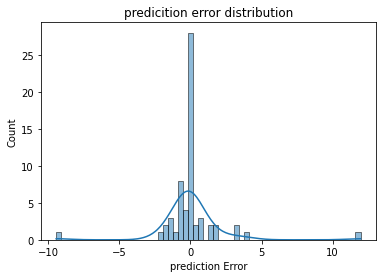

In [162]:
sns.histplot(x=y_test - predictions, kde=True)
plt.xlabel("prediction Error")
plt.title("predicition error distribution")
plt.show()

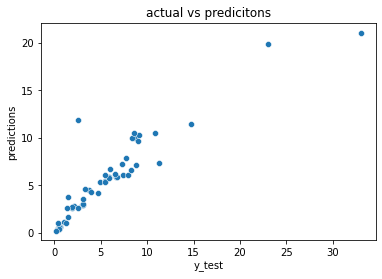

In [163]:
sns.scatterplot(x= y_test, y=predictions)
plt.xlabel("y_test")
plt.ylabel("predictions")
plt.title("actual vs predicitons")
plt.show()

### Save the model

In [150]:
import pickle

f = open("car_prediction.pkl", 'wb')

pickle.dump(model, f)